In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Чтение датасета
data = pd.read_csv('data.csv')
data.columns = ['x1', 'x2', 'x3', 'y']

#### 1a Обучите линейную регрессию. Предскажите значения для x=1,2,3

In [10]:
X = data[['x1', 'x2', 'x3']]  # Признаки
y = data['y']     # Целевая переменная

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)
y_pred

Среднеквадратичная ошибка (MSE): 1.7641619805353035


array([ 1.93431942,  3.44707801, -2.30929891,  4.00214762, -0.66258611,
       -0.89475947, -0.00929735,  1.50346125,  5.91227584,  5.21800225,
        2.91800069, -1.25864054,  1.37175354,  4.36602869,  3.15017405,
        5.87878728,  4.66293265,  3.96865907, -1.19166343,  0.51977997])

#### 1b Используя кросс-валидацию и среднеквадратичную функцию потерь, оцените точность и способность к генерализации у модели

In [11]:
# Создаем модель регрессии
model = LinearRegression()

# Выполняем кросс-валидацию с 5 фолдами
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Конвертируем отрицательные значения ошибки в положительные
mse_scores = -cv_scores

# Среднее значение ошибки
mean_mse = np.mean(mse_scores)

# Стандартное отклонение ошибки
std_mse = np.std(mse_scores)

print("Mean Squared Error (Среднеквадратичная ошибка):", mean_mse)
print("Standard Deviation of MSE:", std_mse)

Mean Squared Error (Среднеквадратичная ошибка): 5.285247137840732
Standard Deviation of MSE: 4.715977894873973


#### 1c Обучите полиномиальную регрессию, для кросс-валидации постройте график bias, variance в зависимости от степени полинома. Какая степень оптимальна? 

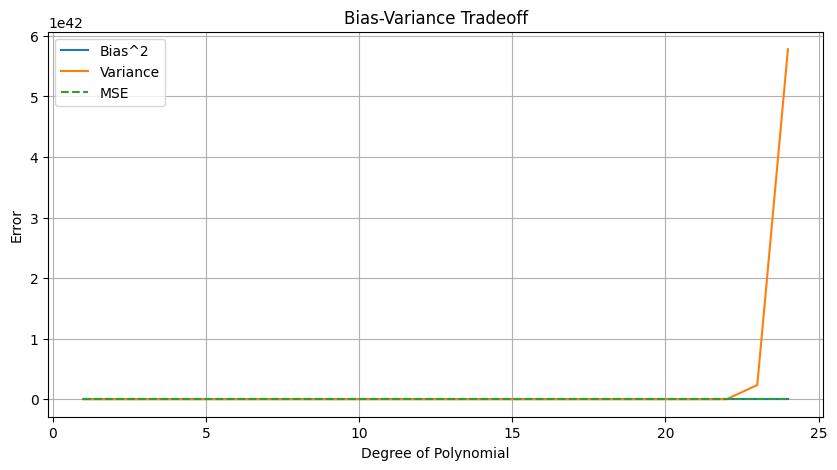

In [13]:
degrees = np.arange(1, 25)

# Создаем списки для сохранения значений смещения, разброса и средней ошибки
bias = []
variance = []
mse = []

# Для каждой степени полинома обучаем модель и оцениваем ее производительность
for degree in degrees:
    # Создаем полиномиальные признаки
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    
    # Выполняем кросс-валидацию с 10 фолдами и используем среднюю квадратичную ошибку для оценки
    scores = -cross_val_score(pipeline, X, y, cv=10, scoring='neg_mean_squared_error')
    
    # Вычисляем среднее значение MSE, смещение и разброс
    mse.append(np.mean(scores))
    bias.append((np.mean(scores) - np.mean(y) ** 2))
    variance.append(np.var(scores))

# Строим график смещения и разброса
plt.figure(figsize=(10, 5))
plt.plot(degrees, bias, label='Bias^2')
plt.plot(degrees, variance, label='Variance')
plt.plot(degrees, mse, label='MSE', linestyle='--')
plt.legend()
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.grid(True)
plt.show()

1d Проведите подбор степени полинома с помощью любого из k-fold на 70% данных. Совпадают ли результаты? Оцените точность модели на оставшихся 30%. 

Best degree of polynomial: 2


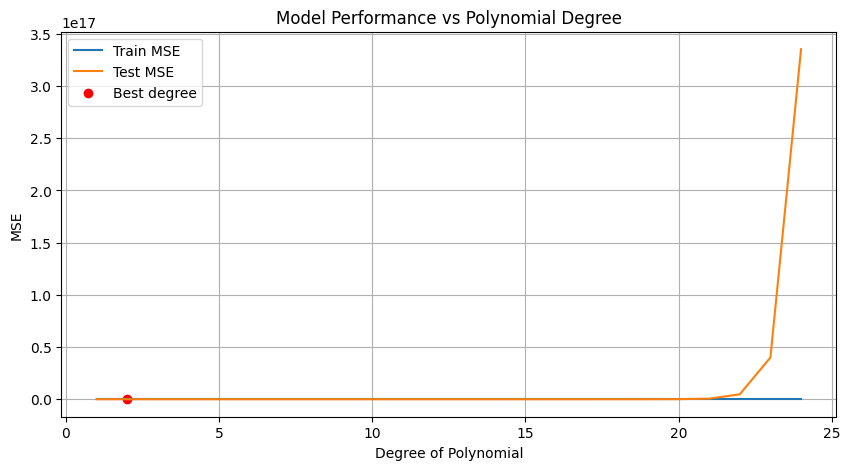

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Разделяем данные на обучающий и тестовый наборы (70% на обучение, 30% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Определяем диапазон степеней полинома
degrees = np.arange(1, 25)

# Создаем списки для сохранения значений MSE на обучающем и тестовом наборах
train_mse = []
test_mse = []

# Для каждой степени полинома обучаем модель и оцениваем ее производительность на обучающем и тестовом наборах
for degree in degrees:
    # Создаем полиномиальные признаки
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])
    
    # Обучаем модель на обучающем наборе
    pipeline.fit(X_train, y_train)
    
    # Оцениваем модель на обучающем наборе
    y_train_pred = pipeline.predict(X_train)
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    
    # Оцениваем модель на тестовом наборе
    y_test_pred = pipeline.predict(X_test)
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Находим степень полинома с минимальным значением MSE на тестовом наборе
best_degree = degrees[np.argmin(test_mse)]
print("Best degree of polynomial:", best_degree)

# Строим график зависимости MSE от степени полинома на обучающем и тестовом наборах
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_mse, label='Train MSE')
plt.plot(degrees, test_mse, label='Test MSE')
plt.scatter(best_degree, test_mse[best_degree - 1], color='red', label='Best degree')
plt.legend()
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.title('Model Performance vs Polynomial Degree')
plt.grid(True)
plt.show()